<h1 align="center">Mechanical Fatigue of Steel</h1>

![Fatigue Image 1](https://dieselship.com/wp-content/uploads/2016/04/fatigue.gif)
![Fatigue Image 2](https://yenaengineering.nl/wp-content/uploads/2020/12/metal-fatigue.png)

Welcome to our journey to understand and predict the mechanical fatigue of steel, a critical factor in various industrial applications. In this project, we dive deep into the world of data science and machine learning to develop a model that can accurately anticipate when fatigue might occur in steel components.

**Project Objective:**
Mechanical fatigue is the weakening of a material caused by repeated loading and unloading. It's a common problem in engineering, as it can lead to the failure of structural components, machinery, and more. Our goal is to build a predictive model that can help us foresee when and where fatigue might appear in steel structures. By doing so, we aim to prevent costly failures, ensure safety, and optimize maintenance schedules.

**The Challenge:**
Steel is a versatile and robust material widely used in industrial contexts. However, the complex interplay of various factors, such as temperature, stress, and manufacturing variability, makes fatigue prediction a challenging task. To tackle this, we will explore multiple machine learning models, including linear regression, regularization, k-nearest neighbors (KNN), gradient boosting machines (GBM), XgBoost, and CatBoost. Each model offers a unique approach to solving the problem.

**What's Ahead:**
In this project, we will take you through the entire data science pipeline. From data collection and preprocessing to model building and evaluation, we will explore each step in detail. We will also explain our choices, why we selected specific models, and what insights we gain along the way.


**Problems with Traditional Methods of Calculating Fatigue:**

**Stress-Life Method (S-N Curve):**
An S-N curve defines the number of cycles to failure, N(S), when a material is repeatedly cycled through a given stress range S.
- **Disadvantages:**
    - **Expensive Experimental Testing:** Constructing an accurate S-N curve requires extensive and costly experimental testing, especially for different materials and conditions.
    - **Time-Consuming:** Experimentally determining the curve for each material can be time-intensive.
    - **Limited Generalization:** S-N curves are specific to particular materials and conditions, limiting their generalizability to new materials or situations.
- **How ML Can Help:**
    - **ML can predict fatigue life** without the need for costly and time-consuming experimental tests.
    - It can generalize well to new materials by learning from diverse datasets.

**Basquin's Equation:**
N = (A / (σ^m))^1/B
Where:
N is the number of cycles to failure.
A, B, m are material-specific constants.
σ is the applied stress.
- **Disadvantages:**
    - **Material-Specific Constants:** A and B in Basquin's equation are material-specific constants that must be determined through experimentation, which can be resource-intensive.
    - **Limited Applicability:** The equation may not be suitable for all materials or complex loading conditions.
    - **Simplified Model:** Basquin's equation assumes a simplified relationship between stress and fatigue life.
- **How ML Can Help:**
    - **ML models can learn complex relationships** between material properties and fatigue life without relying on simplified equations.
    - They can predict fatigue life for a broader range of materials and conditions.

**Miner's Rule:**
Miner's rule uses the sum of the ratio of the number of cycles at each amplitude (n) over the number of cycles to failure (N) at that respective amplitude on a Woehler curve. The sum of these ratios yields total damage.
- **Disadvantages:**
    - **Cumulative Damage Assumption:** Miner's Rule makes a simplifying assumption that damage from different load cycles is additive, which may not be accurate for all materials or situations.
    - **Complex Calculation:** Calculating damage ratios and summing them for multiple loads can be computationally intensive for large datasets or complex load histories.
- **How ML Can Help:**
    - ML can **capture nonlinear interactions** between load cycles and damage more accurately.
    - It can handle complex calculations efficiently and adapt to various loading conditions.



In [5]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings
%matplotlib inline
pd.set_option('display.max_columns', None)

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24512\1832983198.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [6]:
# importing dataset 
df = pd.read_csv("Fatigue Dataset for Steel.csv")

In [7]:
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.21,0.44,0.017,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.25,0.18,0.44,0.009,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.27,0.43,0.008,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.23,0.51,0.018,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.22,0.19,0.42,0.026,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


### This database comprises : 
 Carbon steels &  Low-alloy steels (371 rows) <br>
 Carburizing steels (48 rows)<br>
 Spring steels (18 rows)

### The features in the dataset can be categorized into the following:

**Chemical composition:**
- %C: Carbon content (wt. %)
- %Si: Silicon content (wt. %)
- %Mn: Manganese content (wt. %)
- %P: Phosphorus content (wt. %)
- %S: Sulphur content (wt. %)
- %Ni: Nickel content (wt. %)
- %Cr: Chromium content (wt. %)
- %Cu: Copper content (wt. %)
- %Mo: Molybdenum content (wt. %)

**Upstream processing details:**
- Ingot size
- Reduction ratio
- Non-metallic inclusions (Agrawal et al.)

**Heat treatment conditions:**
- Temperature
- Time
- Other process conditions for:
  - Normalizing
  - Through-hardening
  - Carburizing-quenching
  - Tempering processes

**Mechanical properties:**
- YS: Yield Strength
- UTS: Ultimate Tensile Strength
- %EL: Percentage Elongation
- %RA: Percentage Reduction in Area
- Hardness
- Charpy Impact Value (J/cm²)
- Fatigue Strength


### Brief Definition of all the columns
- **C (%):** 
  - Abbreviation: Carbon content (wt. %)
  - Explanation: The percentage of carbon in the material, a key factor influencing its properties and behavior.

- **Si (%):** 
  - Abbreviation: Silicon content (wt. %)
  - Explanation: The percentage of silicon in the material, affecting properties like strength and heat resistance.

- **Mn (%):** 
  - Abbreviation: Manganese content (wt. %)
  - Explanation: The percentage of manganese in the material, influencing its strength and hardenability.

- **P (%):** 
  - Abbreviation: Phosphorus content (wt. %)
  - Explanation: The percentage of phosphorus in the material, which can affect its brittleness and strength.

- **S (%):** 
  - Abbreviation: Sulphur content (wt. %)
  - Explanation: The percentage of sulfur in the material, impacting machinability and toughness.

- **Ni (%):** 
  - Abbreviation: Nickel content (wt. %)
  - Explanation: The percentage of nickel in the material, contributing to corrosion resistance and strength.

- **Cr (%):** 
  - Abbreviation: Chromium content (wt. %)
  - Explanation: The percentage of chromium in the material, enhancing its corrosion resistance and durability.

- **Cu (%):** 
  - Abbreviation: Copper content (wt. %)
  - Explanation: The percentage of copper in the material, influencing electrical conductivity and corrosion resistance.

- **Mo (%):** 
  - Abbreviation: Molybdenum content (wt. %)
  - Explanation: The percentage of molybdenum in the material, improving strength and high-temperature performance.

- **NT:** 
  - Abbreviation: Normalizing Temperature
  - Explanation: The temperature at which the material is subjected to the normalizing heat treatment process.

- **THT:** 
  - Abbreviation: Through Hardening Temperature
  - Explanation: The temperature for the through-hardening heat treatment process, enhancing material hardness.

- **THt:** 
  - Abbreviation: Through Hardening Time
  - Explanation: The duration for the through-hardening heat treatment process, affecting material strength.

- **THQCr:** 
  - Abbreviation: Cooling Rate for Through Hardening
  - Explanation: The rate at which the material is cooled during through-hardening, influencing hardness and toughness.

- **CT:** 
  - Abbreviation: Carburization Temperature
  - Explanation: The temperature at which carburization is performed, increasing surface carbon content.

- **Ct:** 
  - Abbreviation: Carburization Time
  - Explanation: The time for the carburization process, enhancing surface hardness.

- **DT:** 
  - Abbreviation: Diffusion Temperature
  - Explanation: The temperature during the diffusion process, promoting even distribution of elements.

- **Dt:** 
  - Abbreviation: Diffusion time
  - Explanation: The duration of the diffusion process, affecting surface properties.

- **QmT:** 
  - Abbreviation: Quenching Media Temperature
  - Explanation: The temperature of the quenching medium used in carburization, influencing material hardness.

- **TT:** 
  - Abbreviation: Tempering Temperature
  - Explanation: The temperature at which tempering is performed, affecting material toughness.

- **Tt:** 
  - Abbreviation: Tempering Time
  - Explanation: The duration of the tempering process, impacting material strength and ductility.

- **TCr:** 
  - Abbreviation: Cooling Rate for Tempering
  - Explanation: The rate at which the material is cooled during tempering, influencing its final properties.

- **RedRatio:** 
  - Abbreviation: Reduction Ratio (Ingot to Bar)
  - Explanation: The ratio by which the material is reduced in size from ingot to bar form.

- **dA:** 
  - Abbreviation: Area Proportion of Inclusions Deformed by Plastic Work
  - Explanation: The proportion of inclusions deformed during plastic work processes.

- **dB:** 
  - Abbreviation: Area Proportion of Inclusions Occurring in Discontinuous Array
  - Explanation: The proportion of inclusions occurring in a discontinuous array within the material.

- **dC:** 
  - Abbreviation: Area Proportion of Isolated Inclusions
  - Explanation: The proportion of isolated inclusions within the material.

- **Fatigue:** 
  - Abbreviation: Rotating Bending Fatigue Strength (10^7 Cycles)
  - Explanation: The material's ability to withstand fatigue failure under cyclic loading, typically measured over 10^7 cycles.


In [8]:
df.shape

(437, 27)

In [9]:
df.columns

Index(['Sl. No.', 'NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo',
       'RedRatio', 'dA', 'dB', 'dC', 'Fatigue'],
      dtype='object')

In [10]:
df.drop('Sl. No.',axis =1,inplace = True)

In [11]:
# checking for null values 
df.isnull().sum()

NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

In [13]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
NT,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
THT,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
THt,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
THQCr,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
CT,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Ct,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
DT,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Dt,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
QmT,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000
TT,437.0,536.842105,164.101963,30.000,550.000,600.000,650.000,680.000


<Axes: >

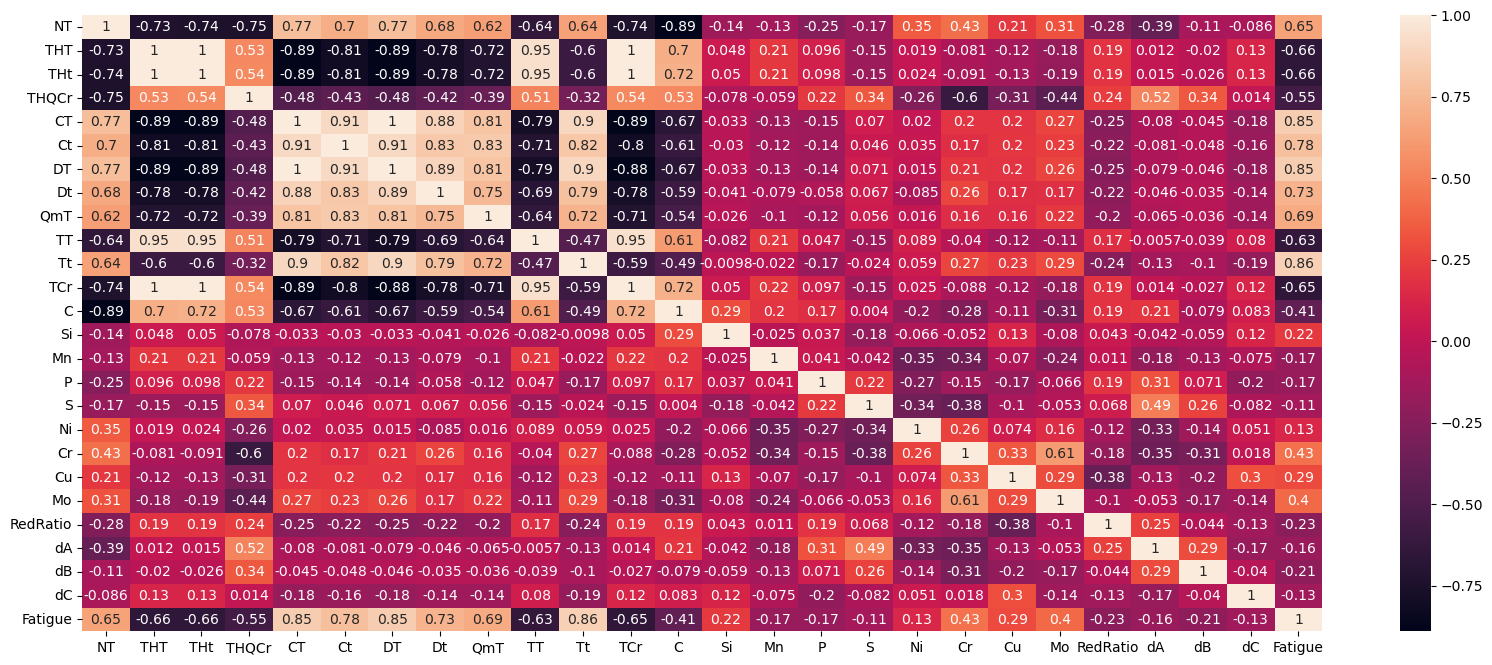

In [14]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(),annot=True)

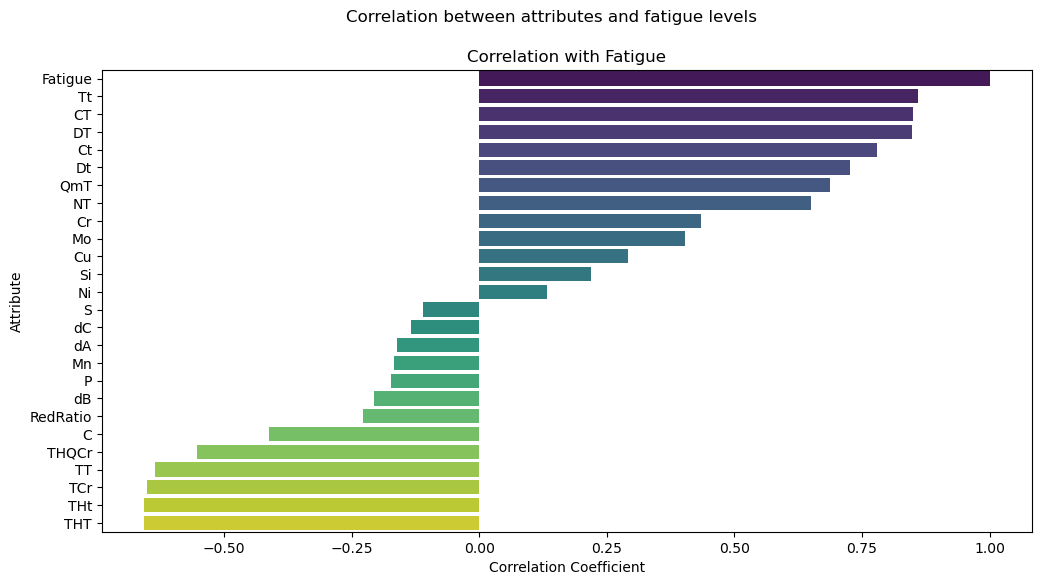

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
correlation_with_fatigue = df.corr()["Fatigue"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_fatigue.values, y=correlation_with_fatigue.index, palette="viridis")
plt.title("Correlation with Fatigue")
plt.xlabel("Correlation")
plt.ylabel("Attribute")

# Adding units, multipliers, and a caption
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute")
plt.title("Correlation with Fatigue")
plt.suptitle("Correlation between attributes and fatigue levels")
plt.show()



In [20]:
# profile_report = pp.ProfileReport(df)
# profile_report

In [21]:
# Data visualization 

Histogram of Carbon content 

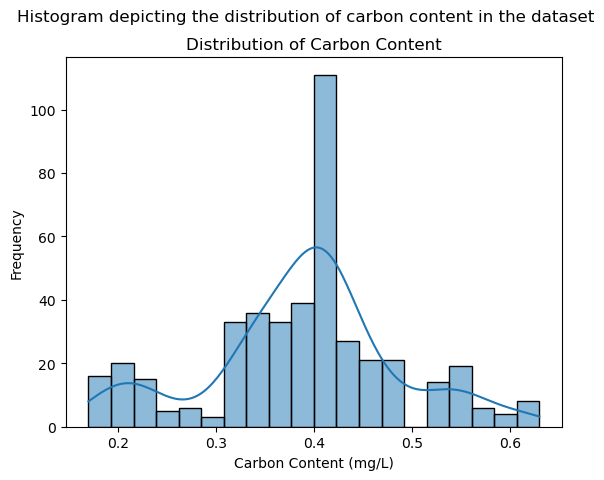

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.histplot(data=df, x='C', bins=20, kde=True)
plt.title("Distribution of Carbon Content")
plt.xlabel("Carbon Content (mg/L)")  # Assuming the unit and multiplier is milligrams per liter (mg/L)
plt.ylabel("Frequency")

# Adding units, multipliers, and a caption
plt.xlabel("Carbon Content (mg/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Carbon Content")
plt.suptitle("Histogram depicting the distribution of carbon content in the dataset")
plt.show()


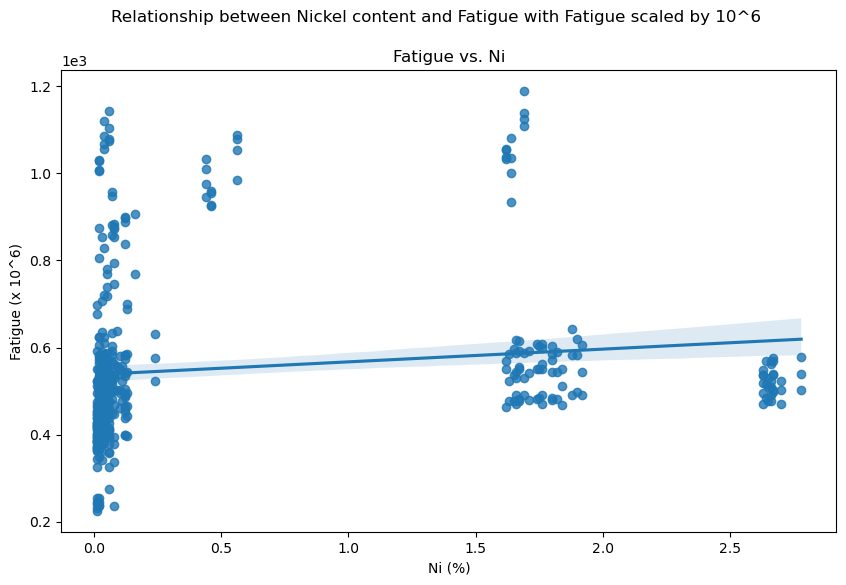

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Ni', y='Fatigue')
plt.title("Fatigue vs. Ni")
plt.xlabel("Ni (%)")
plt.ylabel("Fatigue (x 10^6)")  # Assuming the multiplier for Fatigue is 10^6
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis

# Adding units, multipliers, and a caption
plt.xlabel("Ni (%)")
plt.ylabel("Fatigue (x 10^6)")
plt.title("Fatigue vs. Ni")
plt.suptitle("Relationship between Nickel content and Fatigue with Fatigue scaled by 10^6")
plt.show()


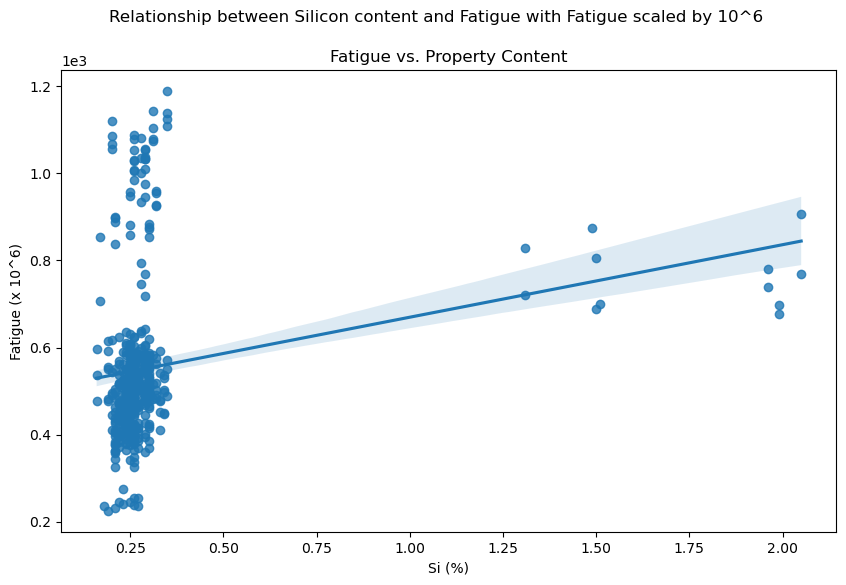

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Si', y='Fatigue')
plt.title("Fatigue vs. Property Content")
plt.xlabel("Si (%)")
plt.ylabel("Fatigue (x 10^6)")  # Assuming the multiplier for Fatigue is 10^6
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis

# Adding units, multipliers, and a caption
plt.xlabel("Si (%)")
plt.ylabel("Fatigue (x 10^6)")
plt.title("Fatigue vs. Property Content")
plt.suptitle("Relationship between Silicon content and Fatigue with Fatigue scaled by 10^6")
plt.show()


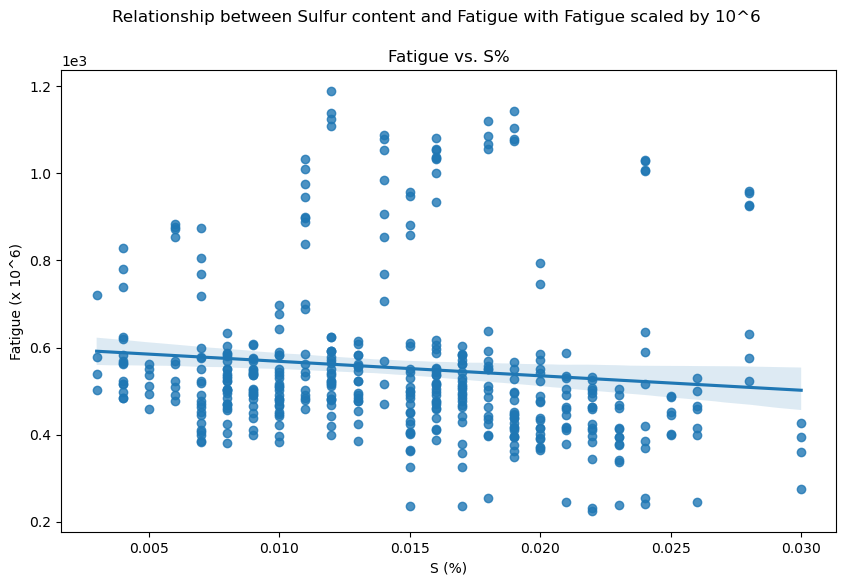

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='S', y='Fatigue')
plt.title("Fatigue vs. S%")
plt.xlabel("S (%)")
plt.ylabel("Fatigue (x 10^6)")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis
plt.suptitle("Relationship between Sulfur content and Fatigue with Fatigue scaled by 10^6")
plt.show()


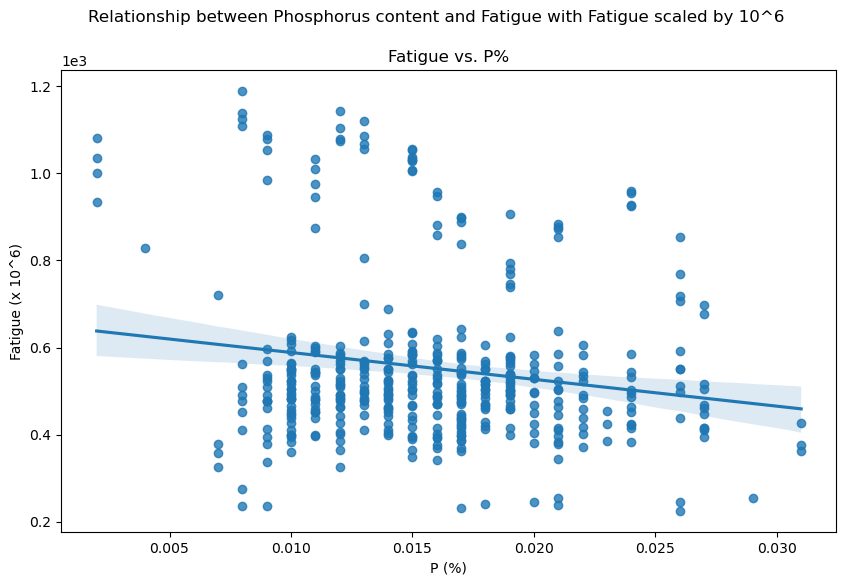

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='P', y='Fatigue')
plt.title("Fatigue vs. P%")
plt.xlabel("P (%)")
plt.ylabel("Fatigue (x 10^6)")  # Assuming the multiplier for Fatigue is 10^6
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis

# Adding units, multipliers, and a caption
plt.xlabel("P (%)")
plt.ylabel("Fatigue (x 10^6)")
plt.title("Fatigue vs. P%")
plt.suptitle("Relationship between Phosphorus content and Fatigue with Fatigue scaled by 10^6")
plt.show()


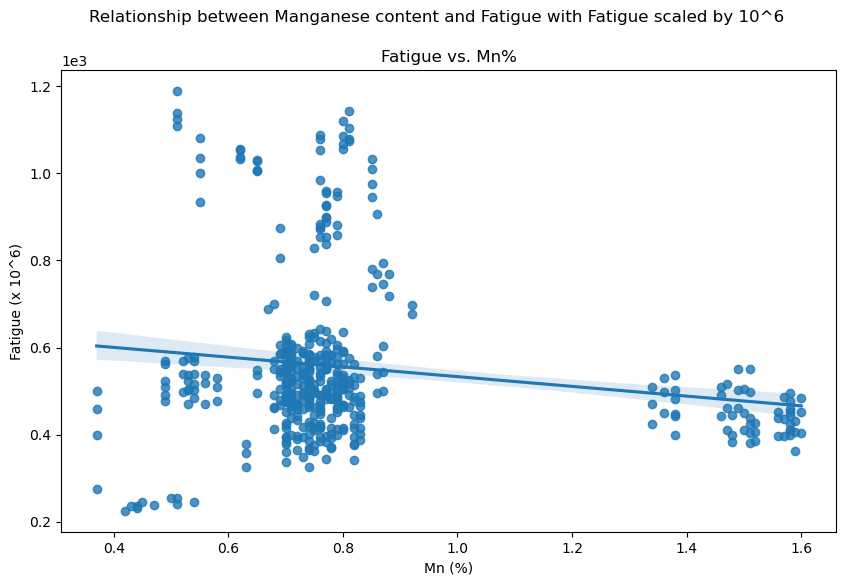

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Mn', y='Fatigue')
plt.title("Fatigue vs. Mn%")
plt.xlabel("Mn (%)")
plt.ylabel("Fatigue (x 10^6)")  # Assuming the multiplier for Fatigue is 10^6
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis

# Adding units, multipliers, and a caption
plt.xlabel("Mn (%)")
plt.ylabel("Fatigue (x 10^6)")
plt.title("Fatigue vs. Mn%")
plt.suptitle("Relationship between Manganese content and Fatigue with Fatigue scaled by 10^6")
plt.show()


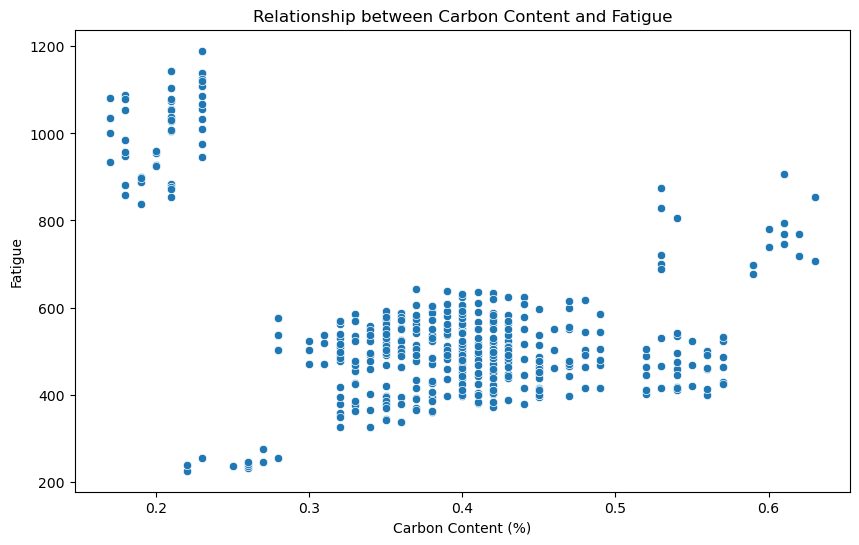

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='C', y='Fatigue')
plt.title("Relationship between Carbon Content and Fatigue")
plt.xlabel("Carbon Content (%)")
plt.ylabel("Fatigue")
plt.show()


Boxplot of Fatigue by Material Composition:

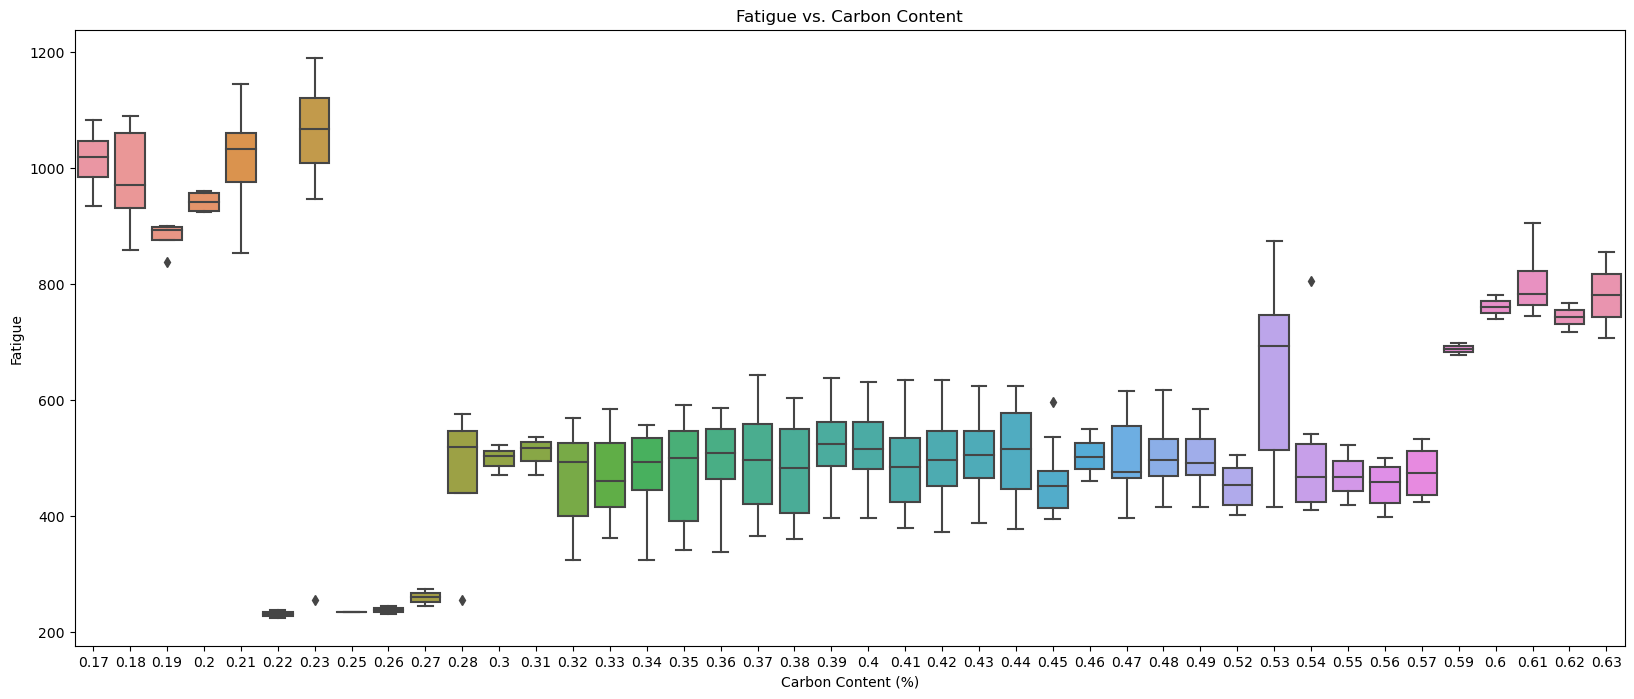

In [29]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='C', y='Fatigue')
plt.title("Fatigue vs. Carbon Content")
plt.xlabel("Carbon Content (%)")
plt.ylabel("Fatigue")
plt.show()

<Figure size 1500x800 with 0 Axes>

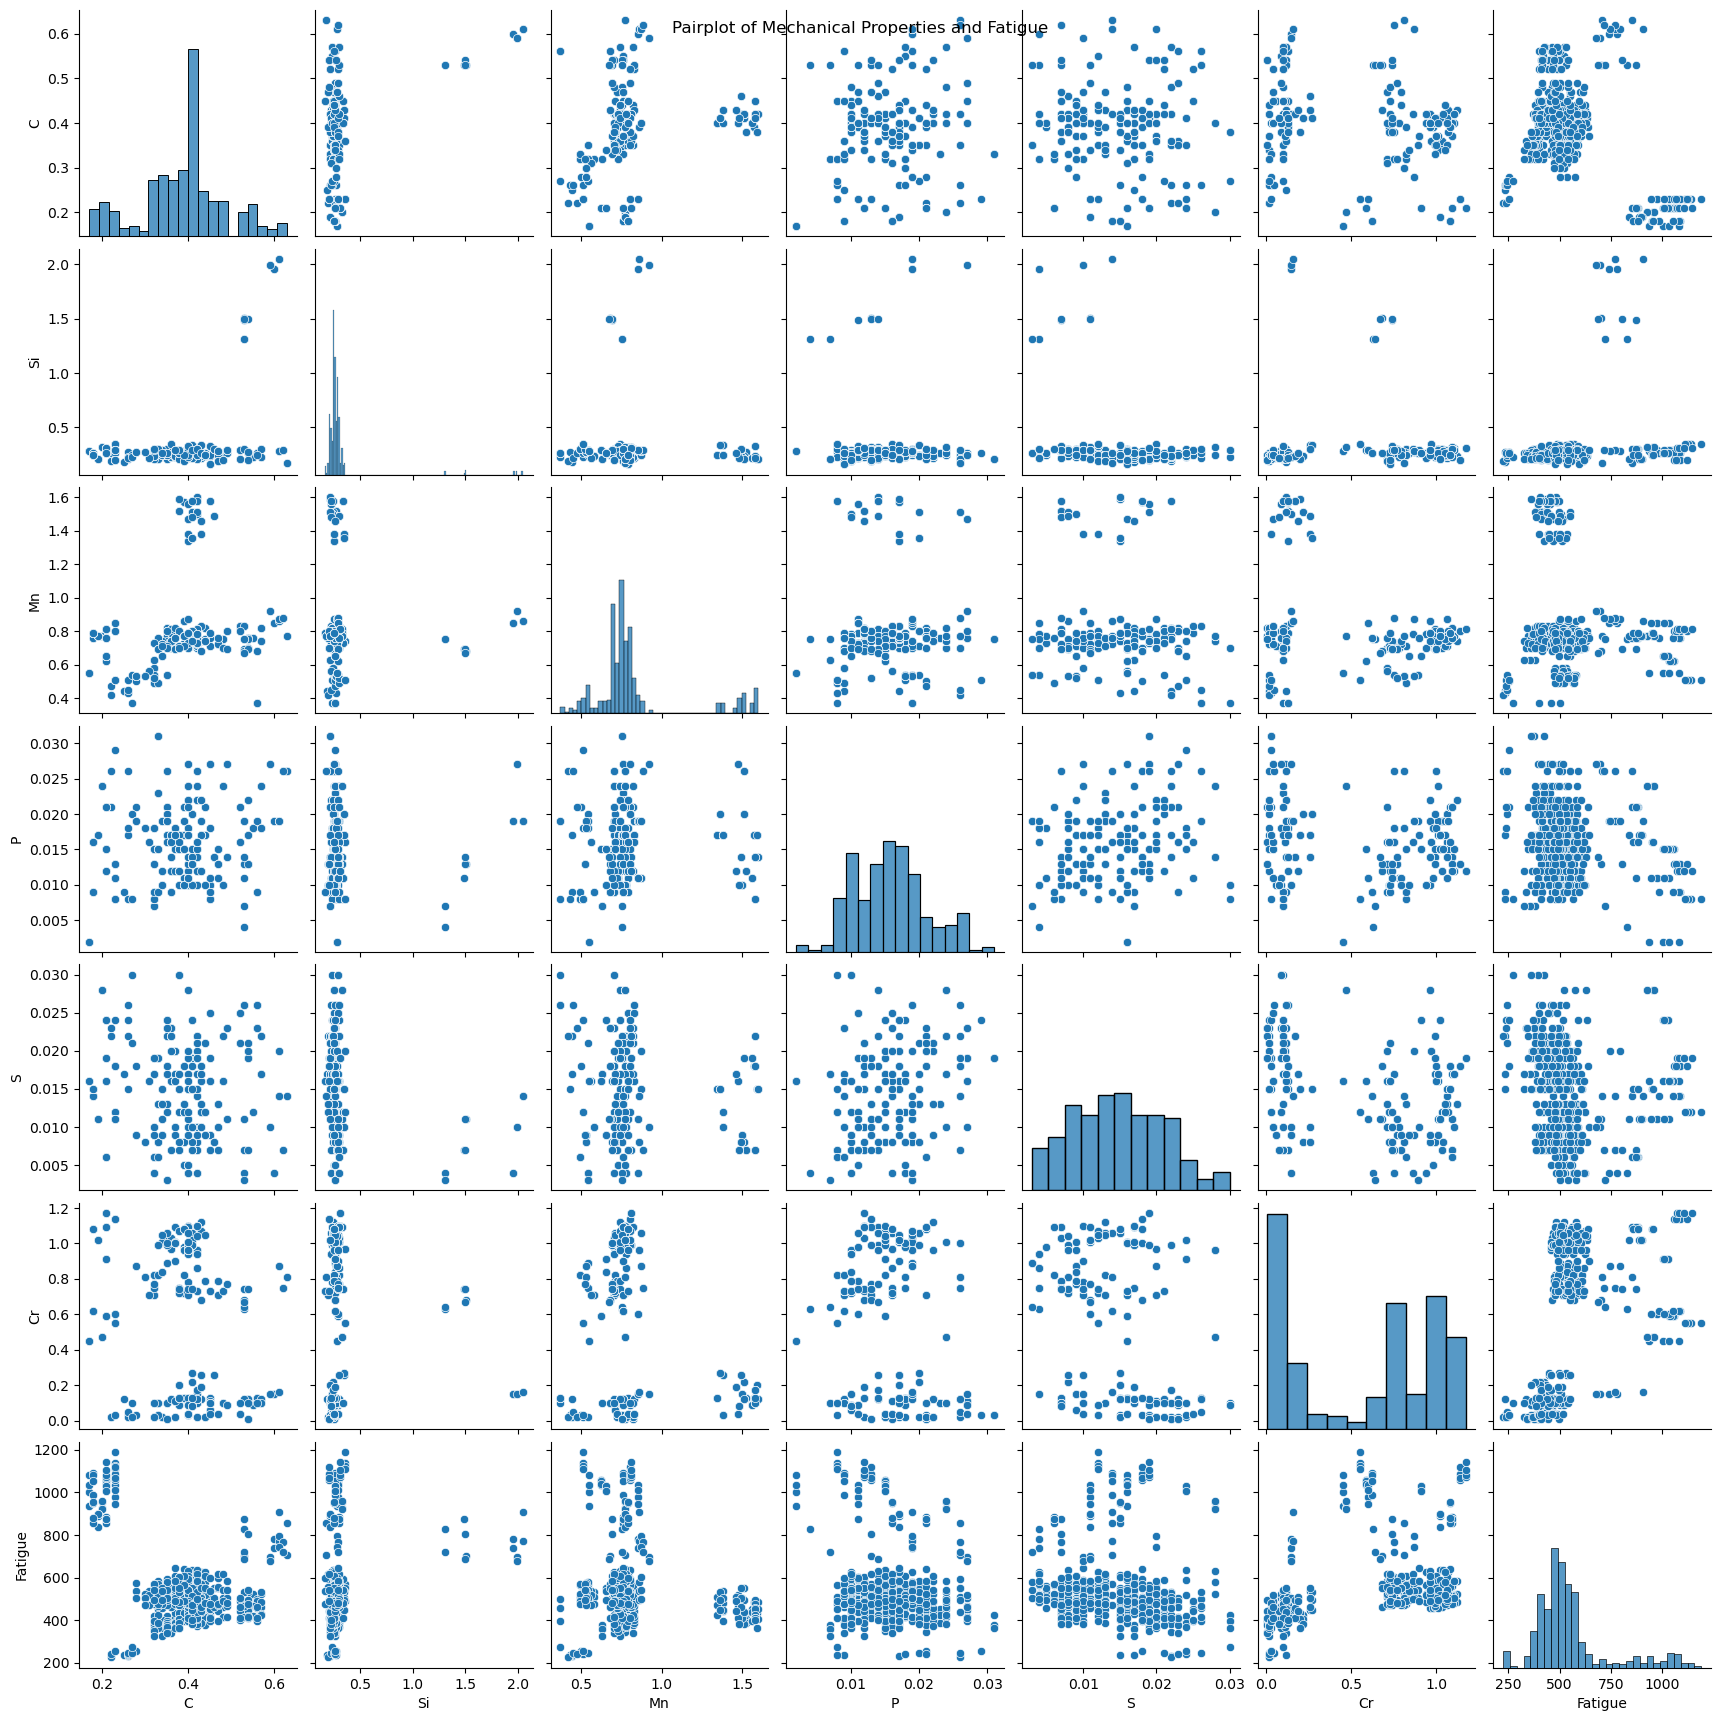

In [30]:
plt.figure(figsize=(15, 8))
sns.pairplot(df[['C', 'Si', 'Mn', 'P', 'S','Cr', 'Fatigue']])
plt.suptitle("Pairplot of Mechanical Properties and Fatigue")
plt.show()

Scatter Plot of Fatigue vs. Heat Treatment Temperatures:

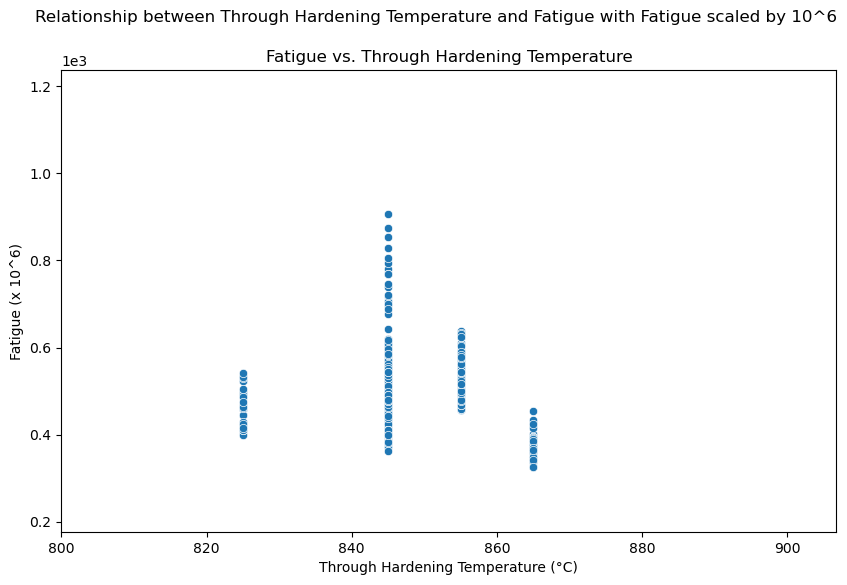

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='THT', y='Fatigue')
plt.title("Fatigue vs. Through Hardening Temperature")
plt.xlim(800,)  # Setting the lower limit for the x-axis
plt.xlabel("Through Hardening Temperature (°C)")
plt.ylabel("Fatigue (x 10^6)")  # Assuming the multiplier for Fatigue is 10^6
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis

# Adding units, multipliers, and a caption
plt.xlabel("Through Hardening Temperature (°C)")
plt.ylabel("Fatigue (x 10^6)")
plt.title("Fatigue vs. Through Hardening Temperature")
plt.suptitle("Relationship between Through Hardening Temperature and Fatigue with Fatigue scaled by 10^6")
plt.show()


Regression Plot of Fatigue vs. Specific Property:

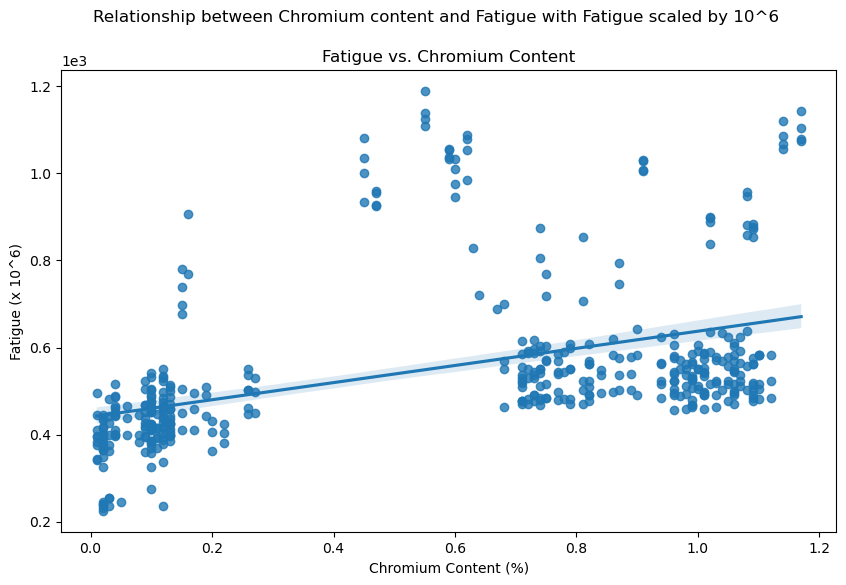

In [25]:

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Cr', y='Fatigue')
plt.title("Fatigue vs. Chromium Content")
plt.xlabel("Chromium Content (%)")
plt.ylabel("Fatigue (x 10^6)")  # Assuming the multiplier for Fatigue is 10^6
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis

# Adding units, multipliers, and a caption
plt.xlabel("Chromium Content (%)")
plt.ylabel("Fatigue (x 10^6)")
plt.title("Fatigue vs. Chromium Content")
plt.suptitle("Relationship between Chromium content and Fatigue with Fatigue scaled by 10^6")
plt.show()


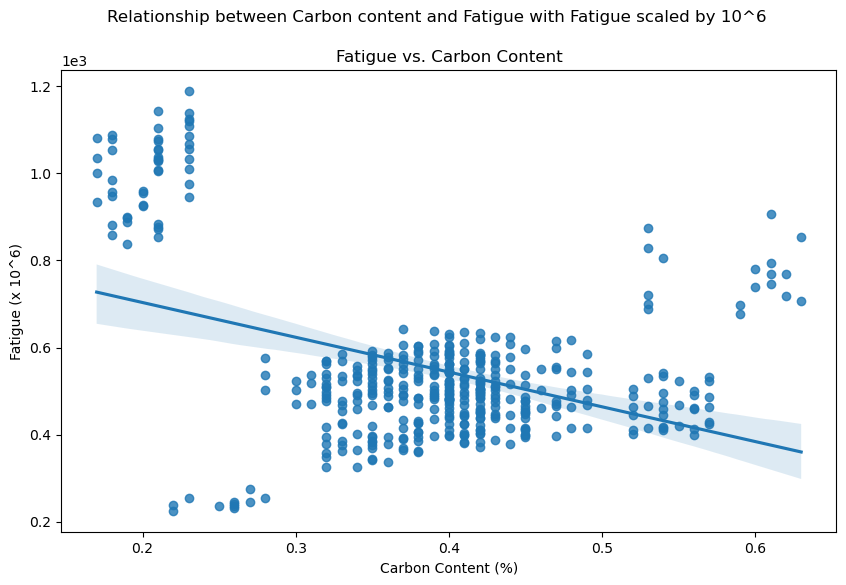

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='C', y='Fatigue')
plt.title("Fatigue vs. Carbon Content")
plt.xlabel("Carbon Content (%)")
plt.ylabel("Fatigue (x 10^6)")  # Assuming the multiplier for Fatigue is 10^6
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))  # Scientific notation for y-axis

# Adding units, multipliers, and a caption
plt.xlabel("Carbon Content (%)")
plt.ylabel("Fatigue (x 10^6)")
plt.title("Fatigue vs. Carbon Content")
plt.suptitle("Relationship between Carbon content and Fatigue with Fatigue scaled by 10^6")
plt.show()

### Modeling

Exploring a range of models to tackle our problem:

1. **Linear Regression**: A straightforward and interpretable choice for your initial analysis.

2. **K-Nearest Neighbors (KNN)**: A non-parametric approach for pattern recognition and classification.

3. **Gradient Boosting Method (GBM)**: A powerful ensemble learning method to enhance predictive accuracy.

4. **XGBoost**: A popular gradient boosting framework known for its efficiency and performance.

5. **CatBoost**: A gradient boosting library optimized for handling categorical features effectively.


Cross Validation will be applied to every model 

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['Fatigue'],axis=1)
y = df['Fatigue']

### Linear Regression 

In [49]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 101)
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

In [67]:
#R^2 Score with Cross Validation
cross_val_score1=cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2',).mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(lr_model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

Verified R2 value for Training model: 0.9616129385598822
Verified R2 value for Testing Model: 0.9133125562040021


In [69]:
#Rmse Score Value with Cross Validation 
train_crs_val = np.sqrt(-cross_val_score(lr_model,X_train,y_train,cv = 10,scoring = "neg_mean_squared_error")).mean()

test_crs_val = np.sqrt(-cross_val_score(lr_model,X_test,y_test,cv = 10,scoring = "neg_mean_squared_error")).mean()

print("train cross val rmse:{}\ntest cross val rmse:{}".format(train_crs_val,test_crs_val))

train cross val rmse:33.92064569658361
test cross val rmse:38.82853476963811


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_9564\1606393262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(lr_model.predict(X_test), hist=False, color="r", label="Predict Values")
C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_9564\1606393262.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

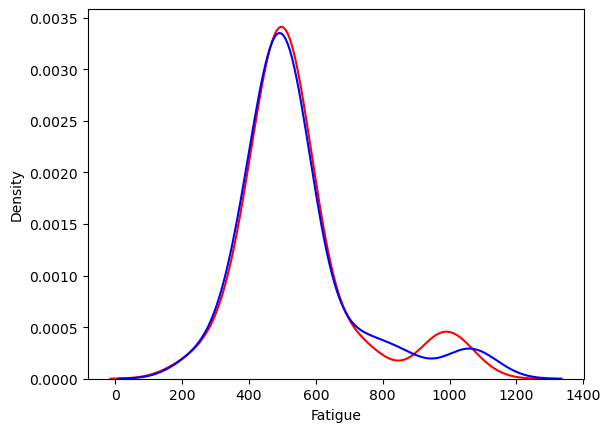

In [70]:
ax1 = sns.distplot(lr_model.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [71]:
d = {'R^2 Score ': [0.91], 'Rmse Score': [0.38]}
lr_data = pd.DataFrame(data=d)
lr_data

,R^2 Score,Rmse Score
0,0.91,0.38


**Considerations:**

1. **Overfitting Risk**: The significant gap between R^2 values for training and testing sets suggests potential overfitting, which can hinder generalization.

2. **Generalization Challenge**: The drop in R^2 from training to testing data highlights a challenge in achieving good performance on new, unseen data.


In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
warnings.filterwarnings("ignore")

# Create an Elastic Net model
elastic_net_model = ElasticNet()

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Create an Elastic Net model with the best hyperparameters
best_elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# Fit the best model to the training data
best_elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_elastic_net_model.predict(X_train)
y_pred_test = best_elastic_net_model.predict(X_test)

# Calculate RMSE for both training and testing data
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Best Alpha:", best_alpha)
print("Best L1 Ratio:", best_l1_ratio)
print("RMSE for Training Data:", rmse_train)
print("RMSE for Testing Data:", rmse_test)

# Calculate R^2 using cross-validation with the best hyperparameters
# Calculate R^2 using cross-validation for the testing set
r2_scores_test = cross_val_score(best_elastic_net_model, X_test, y_test, cv=10, scoring='r2').mean()
print("Cross-Validated R^2 Scores for Testing Set:", r2_scores_test)

Best Alpha: 0.01
Best L1 Ratio: 0.9
RMSE for Training Data: 33.18260437012938
RMSE for Testing Data: 38.267336760095596
Cross-Validated R^2 Scores for Testing Set: 0.9112201012085311


**Considerations:**

1. **Overfitting with Elastic Net:** The lack of significant improvement in R^2 and the persistently high RMSE for the testing set indicate that the Elastic Net model may still be overfitting the data, potentially due to its complexity.

**Exploring Alternative Models:**

1. **K-Nearest Neighbors (KNN):** KNN can capture non-linear relationships, making it a robust choice when dealing with complex data relationships.

2. **Ensemble Methods (e.g., GBM and XGBoost):** Ensemble methods are known for their ability to handle complex relationships and outliers effectively. They can be valuable when linear models fall short.

3. **Hyperparameter Tuning:** Thoroughly search for the best hyperparameters for the models we explore, as optimizing hyperparameters can significantly impact model performance.


### KNN
K nearest neighbors <br>
Scaling the data first before using KNN (This step is mandatory for KNN models to perform)

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [59]:
# Model Tuning
k = {'n_neighbors': np.arange(1, 50)}  # Expanded range and larger steps

knn_model = KNeighborsRegressor()

cv_model = GridSearchCV(knn_model, k, cv=10)

cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [60]:
# Know the Best params
cv_model.best_params_

{'n_neighbors': 1}

☝️ This can cause Overfitting 🥲

In [61]:
knn_model_tuned = KNeighborsRegressor(n_neighbors = cv_model.best_params_["n_neighbors"])
knn_model_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [63]:
print("R^2 values:{}".format(knn_model_tuned.score(X_test, y_test)))
y_pred = knn_model_tuned.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

R^2 values:0.8728444706010132
rmse: 62.13283058386795


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_9564\1743331372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(knn_model_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_9564\1743331372.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

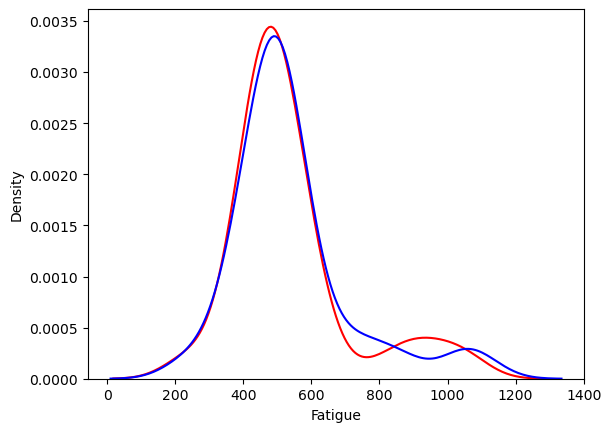

In [65]:
ax1 = sns.distplot(knn_model_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [64]:
d = {'R^2 Score ': [0.87], 'Rmse Score': [.62]}
knn_data = pd.DataFrame(data=d)
knn_data

,R^2 Score,Rmse Score
0,0.87,0.62


**Considerations:**

- With `n_neighbors = 1`, our KNN model is likely overfitting the training data (Very Low Bias), leading to high model variance.
- The model may not generalize well to new, unseen data because it's overly sensitive to noise and fluctuations in the training data.


### Now Using Ensemble Methods (Specifically Boosting)

**Why Boosting (Ensemble Methods)?**

After observing suboptimal model performance with initial linear,regularized and KNN models, we turn to ensemble methods like Boosting to address the following:

**1. Complex Relationships:** Linear models may struggle to capture intricate, non-linear patterns present in the data.

**2. Overfitting:** We aim to mitigate overfitting by combining the predictive power of multiple base models, enhancing robustness to noise in the dataset.

Boosting iteratively corrects model errors and focuses on challenging data points, making it a promising solution to improve predictive accuracy while addressing complex relationships and overfitting.


### Gradient Boosting Method

**Gradient Boosting (GBM):** A machine learning ensemble technique that sequentially combines predictions from multiple base models, such as decision trees, using a learning rate (alpha) to optimize predictive accuracy. It updates predictions by fitting each base model to the negative gradient of the loss function and scales their contributions by alpha, gradually improving the ensemble's performance. The choice of alpha is a hyperparameter that balances learning speed and overfitting. <br>
**Final Prediction:** F(x) = α₀ * h₀(x) + α₁ * h₁(x) + α₂ * h₂(x) + ... + αₙ * hₙ(x)<br>
- **F(x)** represents the final prediction for the input data point x.
- **α0,α1,α2, ..., αn** are the learning rates for each base model (decision tree).
- **h0(x), h1(x), h2(x), ..., hn(x)** are the predictions of each base model (decision tree) for the input data point x.




- Overfitting challenges observed with traditional linear regression, regularization, and K-nearest neighbors (KNN) led us to seek a more robust modeling approach.
- Gradient Boosting (GBM) was chosen for its sequential combination of base models, primarily decision trees, using learning rates to optimize predictive accuracy, thereby mitigating overfitting and capturing complex data patterns.
- The transition to GBM aims to address overfitting issues and leverage the strengths of ensemble methods to enhance predictive accuracy in our research project.


In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create a Gradient Boosting Regressor
gbm = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for GridSearchCV
gbm_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

# Get the best model
best_gbm_model = grid_search.best_estimator_

In [87]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,max_depth = 3,n_estimators = 200,subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

y_pred = gbm_tuned.predict(X_test)

print("R^2 values:{}".format(gbm_tuned.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

R^2 values:0.9822031637208816
rmse: 23.244751978705


Text(0.5, 0, 'Variable Significance Levels')

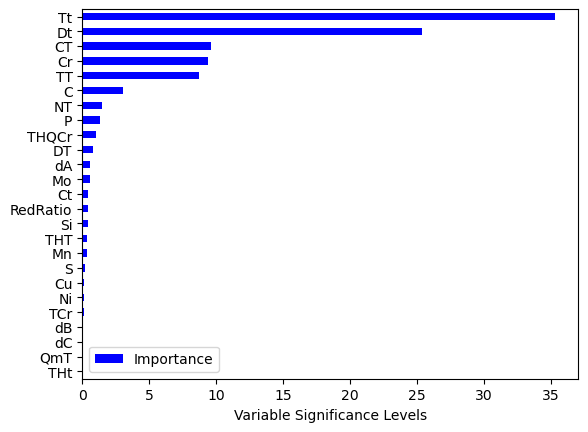

In [89]:
# Create a DataFrame to hold feature importance scores
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_ * 100},index = X_train.columns)

# Sort the features by their importance in ascending order
# This is important so that the most important features are at the top of the plot
Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind ="barh", color = "b")

# Set labels for the x-axis
plt.xlabel("Variable Significance Levels")

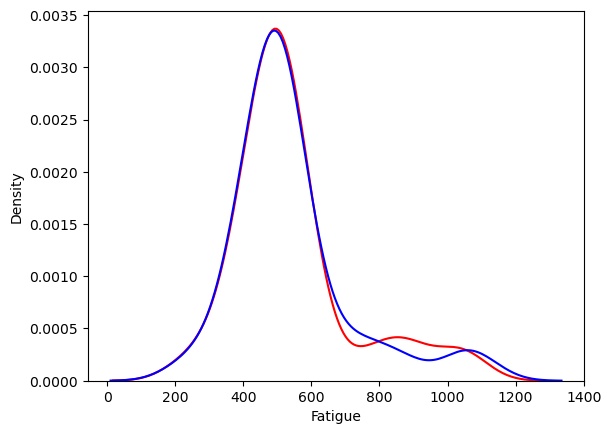

In [90]:
ax1 = sns.distplot(gbm_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [91]:
d = {'R^2 Score ': [0.98], 'Rmse Score': [0.23]}
gbm_data = pd.DataFrame(data=d)
gbm_data

,R^2 Score,Rmse Score
0,0.98,0.23


**Considerations and Next Steps**

1. **Reduced Overfitting:** The Gradient Boosting Machine (GBM) model has significantly reduced overfitting compared to previous models. It achieves an R-squared value of 0.98 and an RMSE of 23.24. This indicates a better balance between model complexity and generalization to new data.

2. **Improved Predictive Power:** GBM's high R-squared value demonstrates its improved predictive power. It captures complex relationships within the data, leading to more accurate fatigue predictions.

3. **Exploring Advanced Methods:** While GBM is performing admirably, it's essential to explore even more advanced methods such as XGboost and CatBoost. These methods are specifically designed for boosting performance and handling large datasets efficiently. They might provide further enhancements in predictive accuracy.

In summary, the GBM model outperforms earlier models by mitigating overfitting and enhancing predictive power. However, to push the predictive performance even further and optimize computational efficiency, we will investigate advanced methods like XgBoost and CatBoost in the next steps.


### XGboost

[XGBoost](https://xgboost.ai/), known as Extreme Gradient Boosting, is a highly versatile and powerful machine learning algorithm designed for outstanding predictive performance. It's proficient in both regression and classification tasks, making it a versatile choice for data scientists. Here's a comprehensive understanding of XGBoost:

### How XGBoost Works

XGBoost constructs predictive models by creating an ensemble of decision trees. These trees are sequentially built, with each one aimed at rectifying errors made by its predecessors. This approach significantly enhances model performance.

### Key Concepts

Let's delve into important concepts that define XGBoost:

- **Similarity Scores:** To determine the best feature splits for decision trees, XGBoost calculates similarity scores. These scores gauge how effectively a split improves the overall model. The formula for similarity scores can be defined as:

    $Similarity Score = \frac{Residuals^2}{Cover + \lambda}$

  Here, Gain is the quality measure of a feature split, Cover represents the number of observations for a given feature, and λ is the regularization term.

- **Gain:** Gain evaluates the quality of a feature split by measuring the reduction in the loss function. It's determined as the difference between the loss before and after the split, often represented as:

    $Gain = Left_{\text{Similarity Score}} + Right_{\text{Similarity Score}} - Root_{\text{Similarity Score}}$

- **Gain - (gamma):** XGBoost introduces regularization through the gamma parameter. This regularization method aids in pruning, preventing overfitting by setting a threshold. Splits with a gain lower than gamma are pruned, leading to more robust models.

- **Cover:** The Cover concept is associated with the number of observations relative to a particular feature. It plays a role in the computation of similarity scores and can be represented as:

    $Cover = \sum \text{number of observations for the feature}$

XGBoost's optimization and regularization techniques, along with these vital concepts, make it a top choice in data science for both competitive challenges and real-world applications.

### Why XGBoost?

1. **Enhanced Predictive Accuracy:** The intricate relationships and complexities within our dataset require a robust and powerful model. XGBoost, known for its exceptional predictive power, excels in capturing nuanced patterns and delivering precise predictions. This is essential for accurate fatigue prediction, where subtle variables play a significant role.

2. **Effective Handling of Non-Linear Relationships:** Previous models, including linear regression and KNN, struggled to capture the non-linear relationships present in our dataset. XGBoost's ensemble of decision trees is tailored to handle such complexities, making it a natural choice to model the intricate interplay of various factors affecting fatigue.

3. **Robustness and Generalization:** XGBoost's ability to reduce overfitting, especially when compared to linear models and its sequential construction of decision trees, results in a model that's more robust and capable of generalizing well to unseen data. This is crucial for real-world applications, ensuring that our fatigue prediction model performs reliably.

By embracing XGBoost, we aim to tackle the complexities of our fatigue prediction task head-on and provide the most accurate and robust results to address our specific challenges.


In [94]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the testing set
y_pred = best_xgb_model.predict(X_test)

# Calculate RMSE and R^2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = best_xgb_model.score(X_test, y_test)

print("Best Parameters: ", grid_search.best_params_)
print("RMSE: ", rmse)
print("R^2 Score: ", r2)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
RMSE:  22.64478746497622
R^2 Score:  0.983110006991932


Text(0.5, 0, 'Variable Significance Levels')

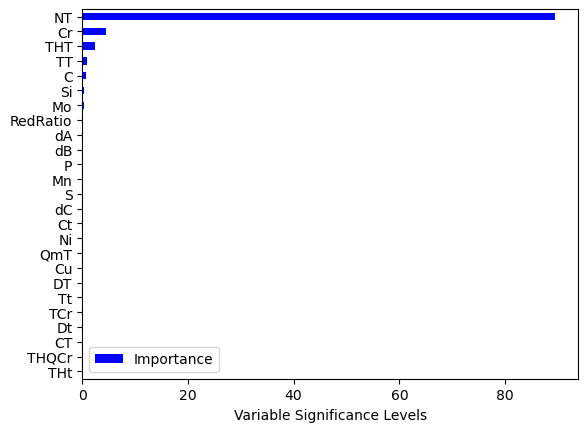

In [96]:
# Create a DataFrame to hold feature importance scores
Importance = pd.DataFrame({"Importance": best_xgb_model.feature_importances_ * 100},index = X_train.columns)

# Sort the features by their importance in ascending order
# This is important so that the most important features are at the top of the plot
Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind ="barh", color = "b")

# Set labels for the x-axis
plt.xlabel("Variable Significance Levels")


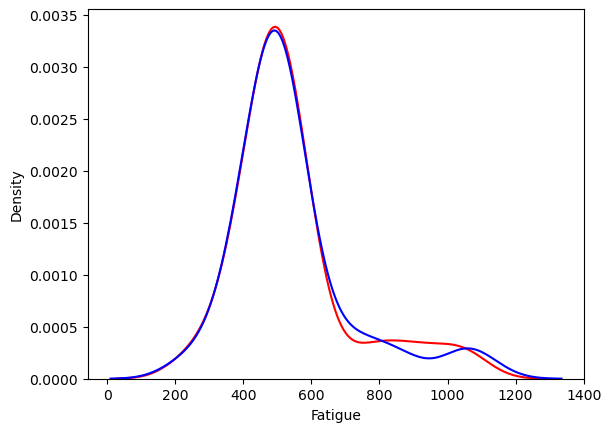

In [97]:
ax1 = sns.distplot(best_xgb_model.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [98]:
d = {'R^2 Score ': [0.98], 'Rmse Score': [0.22]}
gbm_data = pd.DataFrame(data=d)
gbm_data

,R^2 Score,Rmse Score
0,0.98,0.22


**Performance Improvement with XGBoost**

We experienced a substantial performance boost after transitioning from Gradient Boosting to XGBoost for our regression model:

1. **Optimized Hyperparameters:** The meticulous selection of hyperparameters using GridSearchCV helped us find the best combination of learning rate, maximum depth, number of estimators, and subsample ratio. This optimization resulted in improved model accuracy.

2. **Enhanced Predictive Power:** XGBoost, known for its speed and robustness, outperformed our previous Gradient Boosting model. With a higher R^2 score and a reduced RMSE, XGBoost excelled in capturing more variance and providing more precise predictions, making it an ideal choice for this dataset.

As our next step, we plan to explore CatBoost, which specializes in handling categorical variables effectively and offers rapid training capabilities. We expect that leveraging CatBoost's strengths will lead to further improvements in our model's performance, making it even more suitable for our project.

We continue to fine-tune our approach and explore the potential of CatBoost to achieve even better results.


### CatBoost

**CatBoost** is a high-performance gradient boosting algorithm designed for both regression and classification tasks. It stands out through a range of technical aspects and optimizations that make it an excellent choice for predictive modeling, especially in our project with a dataset of 437 rows and 20+ numerical columns. Here's what sets CatBoost apart:

### Key Technical Aspects:

1. **Categorical Feature Handling**: CatBoost efficiently deals with categorical features. It employs a unique technique called ordered boosting to handle categorical data directly, without the need for one-hot encoding or extensive preprocessing. This simplifies the data pipeline and minimizes the risk of information loss during transformation.

2. **Regularization Techniques**: CatBoost includes L2 regularization to prevent overfitting, making it more resilient to noisy data and providing better generalization. By controlling the depth of the trees, it helps optimize the model's performance.

3. **Optimized Computation**: CatBoost is optimized for both speed and memory efficiency. It utilizes oblivious trees that minimize memory consumption and allow parallelization, making it suitable for large datasets like ours.

### Differences from Other Boosting Methods:

- **Categorical Features**: Unlike many boosting methods, CatBoost inherently handles categorical features, which is especially beneficial for our dataset. This reduces complexity and avoids potential information loss due to encoding.

- **Robust Generalization**: CatBoost is robust to overfitting, thanks to its advanced techniques like ordered boosting, oblivious trees, and regularization.

- **Optimization**: CatBoost employs optimizations like oblivious trees for faster and more efficient computation, making it a powerful tool for our project's data scale.

### Why CatBoost is Ideal for Our Project:

Considering the characteristics of our dataset, including the need for predictive modeling with the given 437 rows and 20+ numerical features, CatBoost shines in several areas:

- **Outlier Handling**: The robust generalization of CatBoost can handle outliers effectively, which is vital in cases where data anomalies may affect model performance.

- **Scalability**: With the optimization techniques, CatBoost can efficiently manage large datasets. Our project, with more than 20 numerical columns, benefits from its speed and resource efficiency.

- **Balanced Performance**: CatBoost strikes a balance between predictive accuracy and model interpretability, which is crucial in real-world applications like ours.

In summary, CatBoost is an optimal algorithm for our project due to its robust generalization, efficient computation, and balanced performance. It can accommodate outliers and handle large datasets while maintaining a balance between predictive power and interpretability.


In [99]:
# Import necessary libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a CatBoost Regressor
catboost = CatBoostRegressor(random_state=42, verbose=0)  # Adjust the verbosity as needed

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_catboost_model = grid_search.best_estimator_

# Predict on the testing set
y_pred = best_catboost_model.predict(X_test)

# Calculate RMSE and R^2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters: ", grid_search.best_params_)
print("RMSE: ", rmse)
print("R^2 Score: ", r2)

Best Parameters:  {'depth': 3, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'n_estimators': 500}
RMSE:  23.242463570854145
R^2 Score:  0.9822066676872973


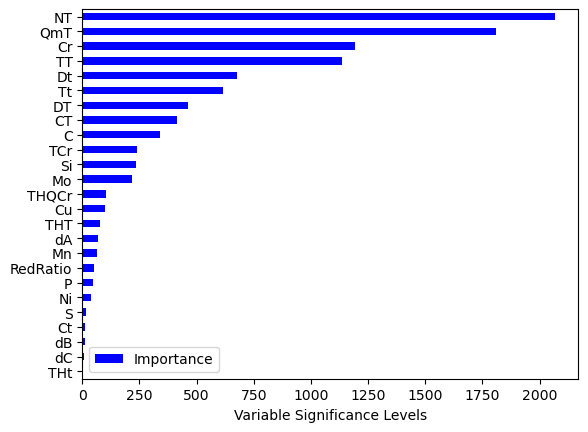

In [101]:
Importance = pd.DataFrame({"Importance": best_catboost_model.feature_importances_*100},index = X_train.columns)

Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind ="barh", color = "b");

plt.xlabel("Variable Significance Levels");

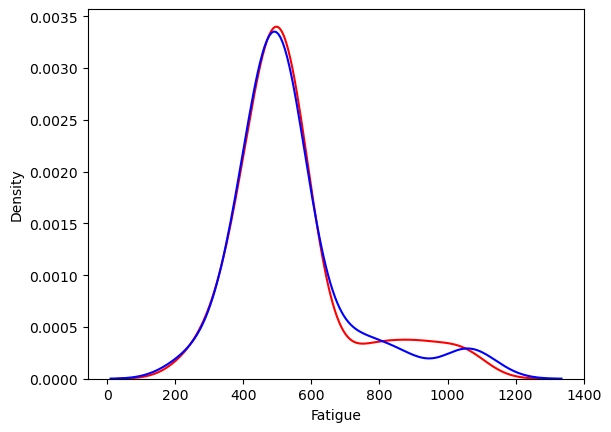

In [102]:
ax1 = sns.distplot(best_catboost_model.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [103]:
d = {'R^2 Score ': [0.98], 'Rmse Score': [0.23]}
catb_data = pd.DataFrame(data=d)
catb_data

,R^2 Score,Rmse Score
0,0.98,0.23


### Considerations and Comparing CatBoost with XGBoost

After applying CatBoost and XGBoost to our dataset, we observed a few key points to consider:

1. **Hyperparameter Optimization:** The parameter tuning results show that for XGBoost, the hyperparameters led to a marginally lower RMSE (Root Mean Square Error) and a slightly higher R^2 score compared to CatBoost. This suggests that XGBoost's specific set of hyperparameters may have been more favorable for our dataset.

2. **Complexity and Interpretability:** XGBoost and CatBoost have different approaches to handling categorical features, where CatBoost has an advantage in handling categorical data directly. However, CatBoost may introduce more complexity in modeling compared to XGBoost. The choice of model should depend on the balance between predictive power and interpretability required for the specific use case.

3. **Performance Variation:** The slight difference in performance is well within the acceptable range. The choice between CatBoost and XGBoost could be influenced by factors such as the ease of use, computational efficiency, and interpretability, in addition to the specific performance metrics.

In summary, both CatBoost and XGBoost have their strengths and performed exceptionally well on our dataset.

## Model Comparison

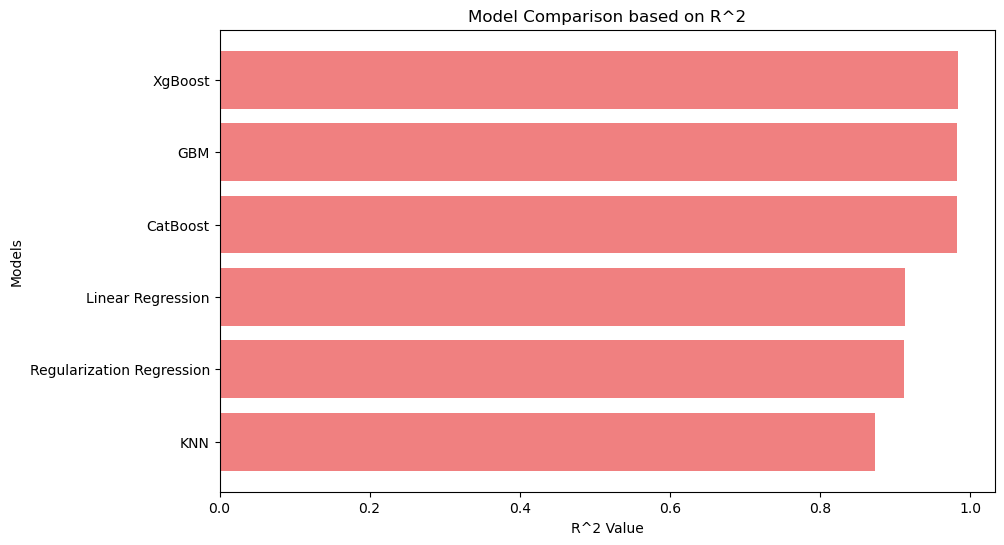

In [107]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Regularization Regression', 'KNN', 'GBM', 'XgBoost', 'CatBoost']

# R^2 values for each model
r2_values = [0.9133, 0.9112, 0.8728, 0.9822, 0.9831, 0.9822]

# Sort models based on R^2 values
sorted_models = [x for _, x in sorted(zip(r2_values, models))]
sorted_r2 = sorted(r2_values)

# Create an R^2 bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_r2, color='lightcoral')
plt.xlabel('R^2 Value')
plt.ylabel('Models')
plt.title('Model Comparison based on R^2')
plt.show()



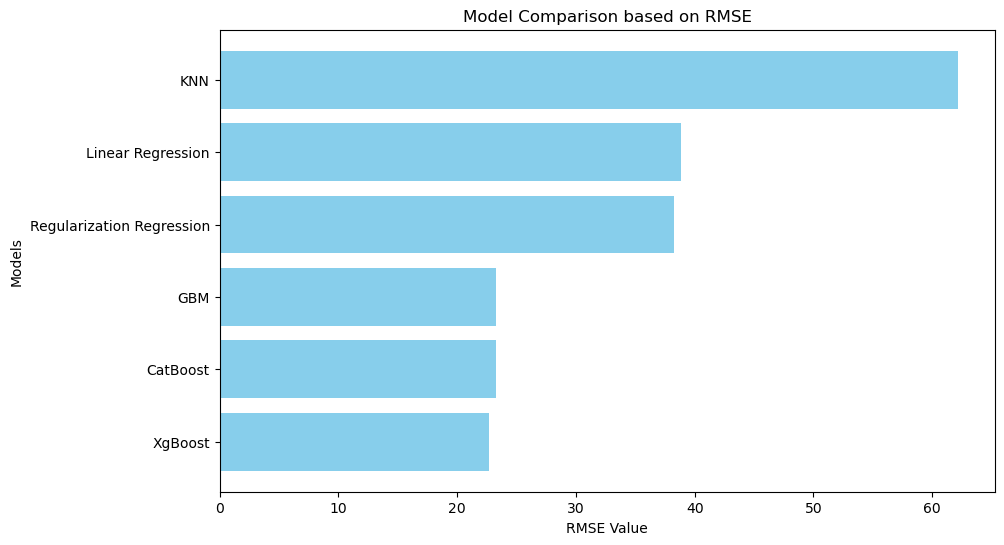

In [108]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Regularization Regression', 'KNN', 'GBM', 'XgBoost', 'CatBoost']

# RMSE values for each model
rmse_values = [38.8285, 38.2673, 62.1328, 23.2448, 22.6448, 23.2425]

# Sort models based on RMSE values
sorted_models = [x for _, x in sorted(zip(rmse_values, models))]
sorted_rmse = sorted(rmse_values)

# Create an RMSE bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_rmse, color='skyblue')
plt.xlabel('RMSE Value')
plt.ylabel('Models')
plt.title('Model Comparison based on RMSE')
plt.show()


# Project Summary

After extensive experimentation with various machine learning models, our mission to predict Fatigue in a practical industrial context concludes with notable findings:

1. **XgBoost Triumphs**: XgBoost, a robust gradient boosting algorithm, emerges as the optimal performer in our quest. It demonstrates the lowest Root Mean Square Error (RMSE) of 22.64 and the highest R-squared (R^2) value of 0.9831. Its ensemble approach, feature importance, and adaptability proved invaluable.

2. **CatBoost's Remarkable Utility**: CatBoost, known for its capacity to handle categorical data with ease, maintains its strong position. It yields a commendable RMSE of 23.24 and an R^2 of 0.9822. This showcases its efficiency in handling our dataset's mixed feature types.

3. **Linear Models: A Miss**: Linear regression models, including those with regularization, falter in capturing the intricacies of our dataset, leading to comparatively weaker results.

4. **GBM's Respectable Showing**: Gradient Boosting Machines (GBM) exhibit solid performance, albeit slightly overshadowed by the more advanced XgBoost.

In summary, our project's final choice for Fatigue prediction is XgBoost, a versatile and powerful model. Its ability to handle both numerical and categorical features, coupled with impressive predictive accuracy, makes it the ideal solution for our real-world industrial application. Meanwhile, CatBoost remains a reliable alternative for scenarios with substantial categorical data. Our research provides critical insights into the strengths and weaknesses of various machine learning models, paving the way for accurate Fatigue prediction in practical industrial settings.
